# **EMPLOYEE BURNOUT ANALYSIS & PREDICTION**

Burnout is a critical issue that impacts employee health, job satisfaction, and organizational productivity. The increasing demands on employees, coupled with poor work-life balance and inadequate mental health support, have led to rising burnout rates. This project aims to predict employee burnout using data-driven regression models. By analyzing various factors like workload, mental fatigue, job designation, and the availability of work-from-home facilities, we can identify employees at risk. Early identification allows organizations to take preventive measures, ensuring employee well-being and enhancing productivity. The objective is to develop a robust model capable of making accurate predictions based on historical data.

# DATASET :

 This dataset consists of 9 columns as follows:

* **Employee ID**: The unique ID allocated for each employee (example:fffe390032003000)
* **Date of Joining**: The date-time when the employee has joined the organization (example: 2008-12-30)
* **Gender**: The gender of the employee (Male/Female)
* **Company Type**: The type of company where the employee is working (Service/Product)
* **WFH Setup Available**: Is the work from home facility available for the employee (Yes/No)
* **Designation**: The designation of the employee of work in the organization. In the range of [0.0, 5.0] bigger is higher designation.
* **Resource Allocation**: The amount of resource allocated to the employee to work, ie. number of working hours.
    
    In the range of [1.0, 10.0] (higher means more resource)
* **Mental Fatigue Score**: The level of fatigue mentally the employee is facing. In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.
* **Burn Rate**: The value we need to predict for each employee telling the rate of Bur out while working. In the range of [0.0, 1.0] where the higher the value is more is the burn out.


# IMPORTING NECESSARY LIBRARIES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
!pip install openpyxl


# LOADING DATASET

# DATA OVERVIEW

In [ ]:
data= pd.read_excel("/content/drive/MyDrive/employee_burnout_analysis-AI 2.xlsx")

In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [ ]:
data["Company Type"].unique()

array(['Service', 'Product'], dtype=object)

In [ ]:
print(data.dtypes)


Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object


In [ ]:
cat_columns = data.select_dtypes('object').columns


In [ ]:
print(cat_columns)


Index(['Employee ID', 'Gender', 'Company Type', 'WFH Setup Available'], dtype='object')


In [ ]:
if len(cat_columns) == 0:
    print("No categorical columns found in the dataset.")
else:
    print("Categorical columns:", cat_columns)


Categorical columns: Index(['Employee ID', 'Gender', 'Company Type', 'WFH Setup Available'], dtype='object')


In [ ]:
data.isnull().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [ ]:
data.isnull().sum().values.sum()

4622

In [ ]:
data.shape

(22750, 9)

In [ ]:
data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [ ]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


# **Exploratory Data Analysis**

In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

,Burn Rate
Designation,0.737556
Resource Allocation,0.856278
Mental Fatigue Score,0.944546


In [ ]:
data = data.dropna()

In [ ]:
data.dtypes

,0
Employee ID,object
Date of Joining,datetime64[ns]
Gender,object
Company Type,object
WFH Setup Available,object
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


In [ ]:
data = data.drop('Employee ID', axis=1)

In [ ]:
print(data.head())


  Date of Joining  Gender Company Type WFH Setup Available  Designation  \
0      2008-09-30  Female      Service                  No            2   
1      2008-11-30    Male      Service                 Yes            1   
3      2008-11-03    Male      Service                 Yes            1   
4      2008-07-24  Female      Service                  No            3   
5      2008-11-26    Male      Product                 Yes            2   

   Resource Allocation  Mental Fatigue Score  Burn Rate  
0                  3.0                   3.8       0.16  
1                  2.0                   5.0       0.36  
3                  1.0                   2.6       0.20  
4                  7.0                   6.9       0.52  
5                  4.0                   3.6       0.29  


Checking the **correlation** of Date of joining with Target Variable

Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired employees'>

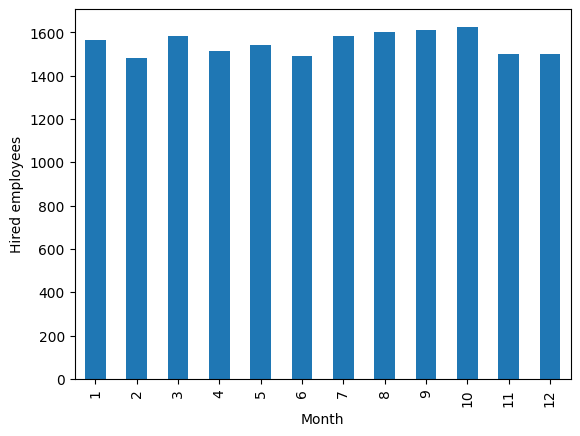

In [ ]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month = data.copy()

data_month["Date of Joining"] = data_month['Date of Joining'].astype("datetime64[ns]")  # Specify time unit as nanoseconds
data_month["Date of Joining"].groupby(data_month['Date of Joining'].dt.month).count().plot(kind="bar", xlabel='Month', ylabel="Hired employees")

In [ ]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
# Specify time unit as nanoseconds when converting to datetime64
data["Days"] = data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

,Days
0,273
1,334
3,307
4,205
5,330
...,...
22743,349
22744,147
22746,18
22748,9


In [ ]:
# Select only numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()['Burn Rate']
print(correlation)

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:]

,Burn Rate
Designation,0.736412
Resource Allocation,0.855005
Mental Fatigue Score,0.944389
Burn Rate,1.000000
Days,0.000309


There is no strong corrleation between Data of Joining & Burn Rate. So , we're dropping the Coloumn of Date of joining

In [ ]:
data = data.drop(['Date of Joining','Days'], axis = 1)

In [ ]:
data.head()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,2,3.0,3.8,0.16,True,False,False
1,1,2.0,5.0,0.36,True,True,True
3,1,1.0,2.6,0.20,True,True,True
4,3,7.0,6.9,0.52,True,False,False
5,2,4.0,3.6,0.29,False,True,True


Analysing the categorical variables

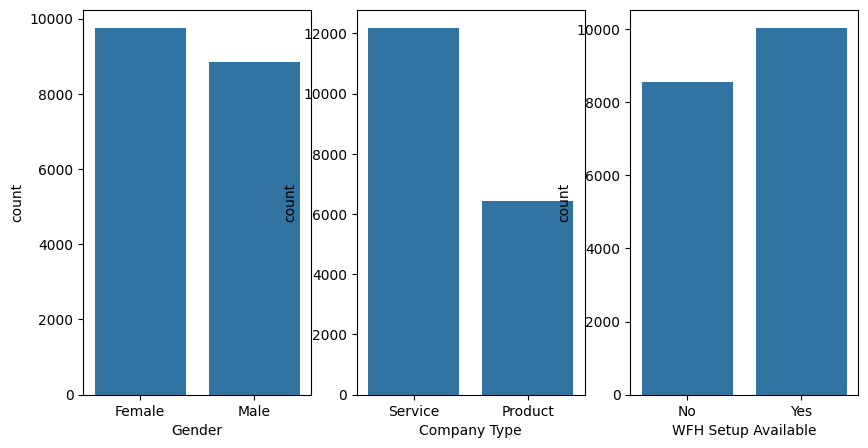

In [ ]:
cat_columns = data.select_dtypes('object').columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(10, 5))
for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=data ,ax=ax[i])
plt.show()


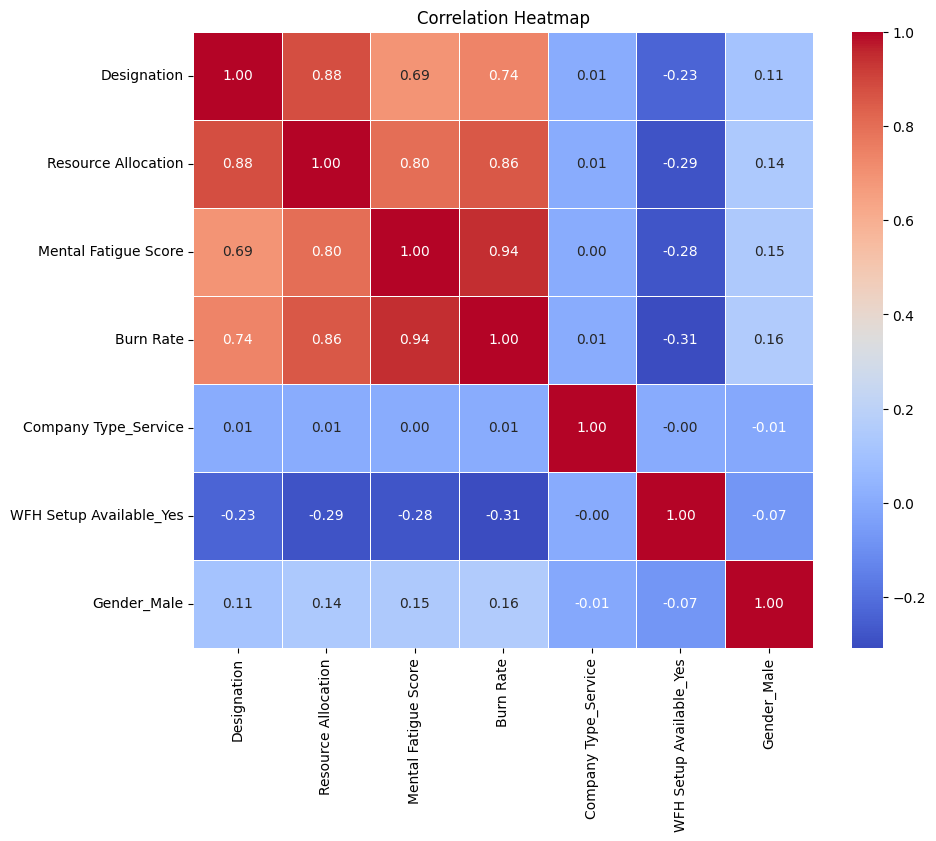

In [ ]:
# Correlation heatmap for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


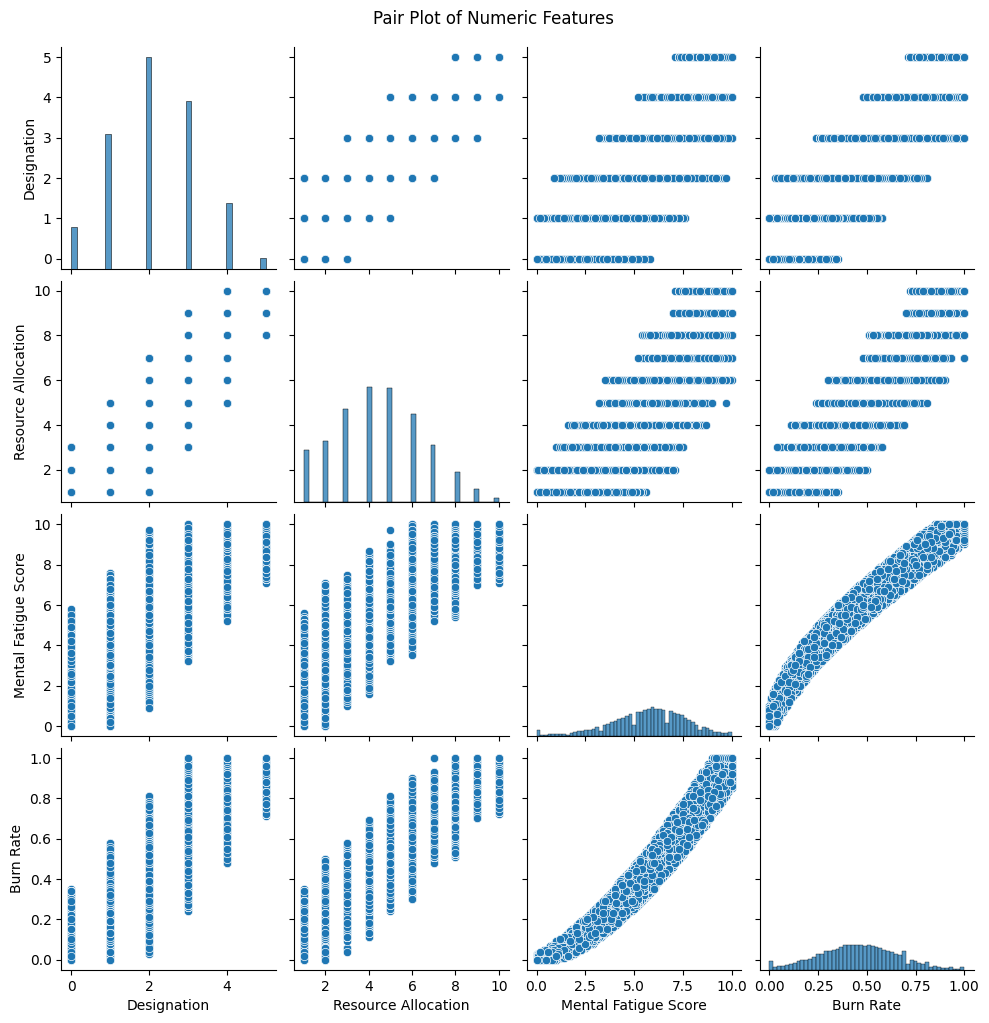

In [ ]:
# Pair plot
sns.pairplot(data[num_columns])
plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.show()




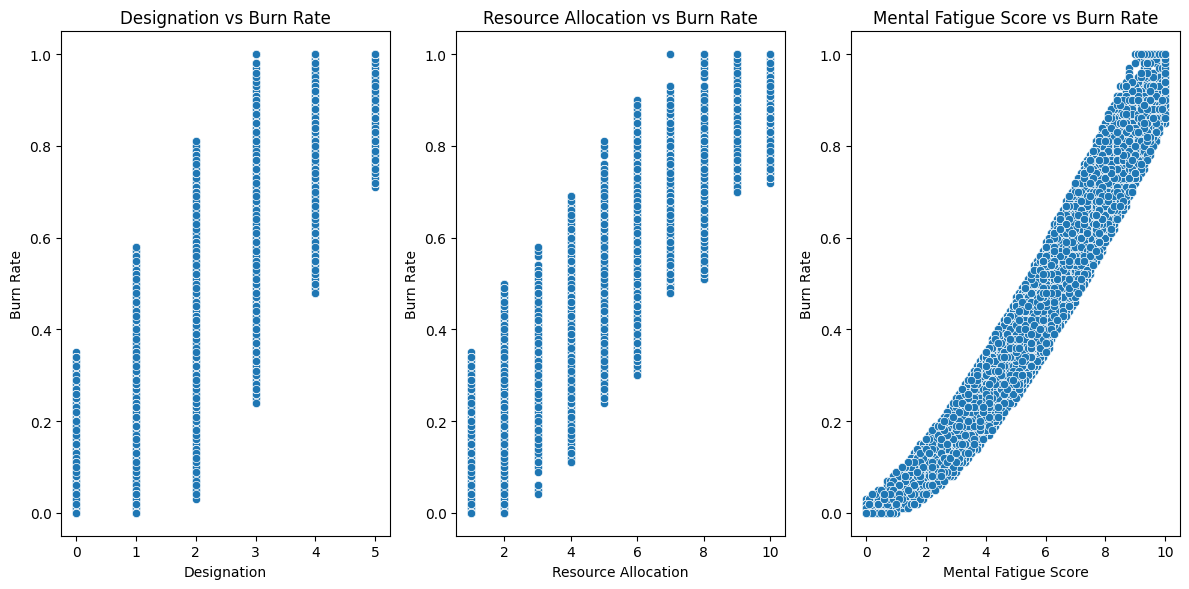

In [ ]:
# Scatter plots for numeric columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_columns[:-1]):  # Avoid plotting the last column against itself
    plt.subplot(1, len(num_columns)-1, i + 1)
    sns.scatterplot(x=data[col], y=data[num_columns[-1]])
    plt.title(f'{col} vs {num_columns[-1]}')
    plt.tight_layout()
plt.show()


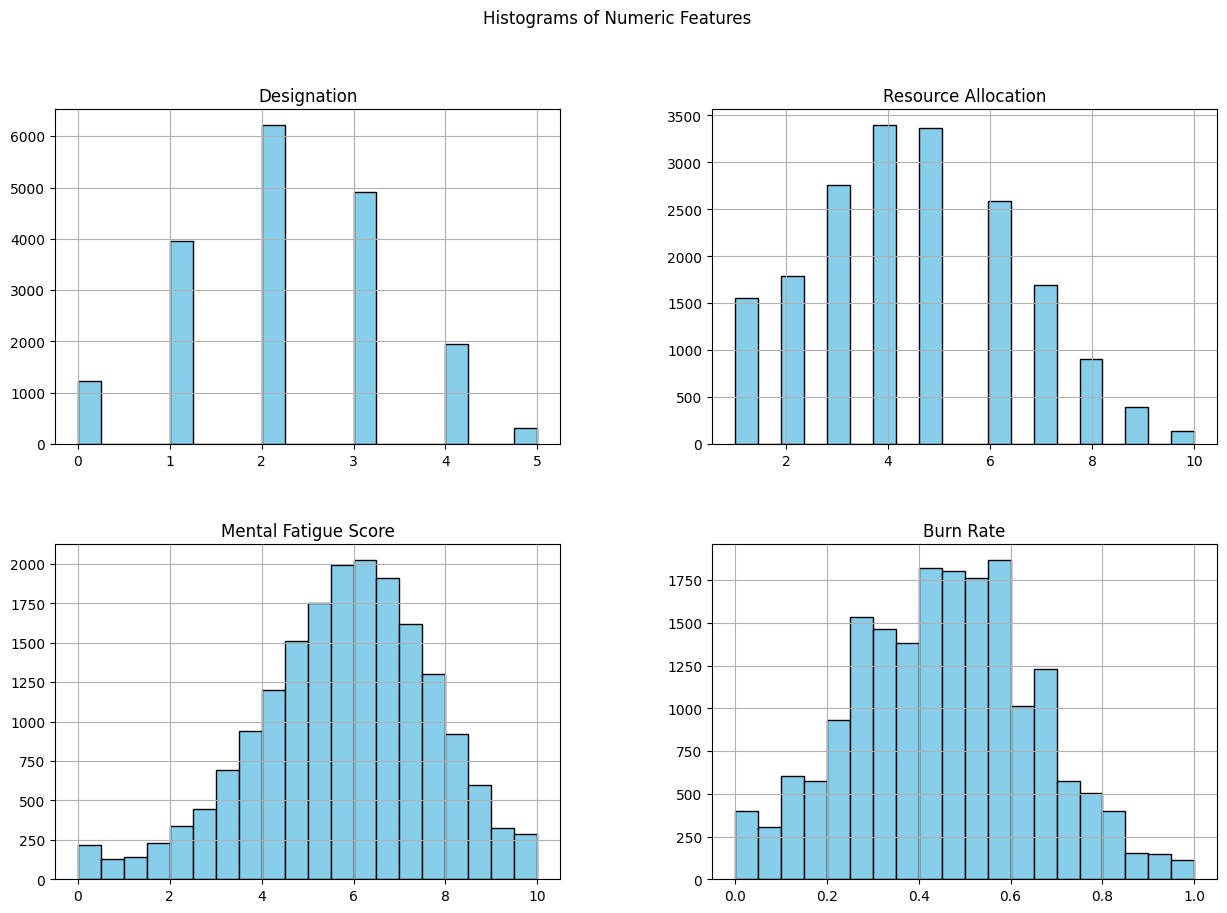

In [ ]:
# Histograms for numeric columns
num_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[num_columns].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.show()


# One-Hot Encoding for categorical features

In [ ]:
# Check if the columns exist before applying get_dummies
if all(col in data.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
    data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available','Gender'], drop_first=True)
    data.head()
    encoded_columns = data.columns
else:
    print("Error: One or more of the specified columns are not present in the DataFrame.")
    # Add debugging steps here to investigate why the columns are missing.
    # For example, print the existing columns:
    print(data.columns)

In [ ]:
data

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,2,3.0,3.8,0.16,True,False,False
1,1,2.0,5.0,0.36,True,True,True
3,1,1.0,2.6,0.20,True,True,True
4,3,7.0,6.9,0.52,True,False,False
5,2,4.0,3.6,0.29,False,True,True
...,...,...,...,...,...,...,...
22743,1,3.0,6.0,0.48,False,True,False
22744,3,7.0,6.2,0.54,False,False,True
22746,3,6.0,6.7,0.59,False,True,False
22748,2,5.0,5.9,0.52,True,False,False


# Preprocessing

In [ ]:
# Split df into X and y
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns )

In [ ]:
X_train

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
8977,0.723327,0.250185,-0.061773,0.724706,-1.082297,1.051505
14115,-0.159330,0.250185,-0.941481,0.724706,-1.082297,-0.951018
8797,0.723327,0.250185,0.973179,0.724706,-1.082297,-0.951018
1173,-1.041987,-1.214568,-0.579248,-1.379869,-1.082297,-0.951018
1941,-0.159330,0.738436,1.180169,-1.379869,0.923961,1.051505
...,...,...,...,...,...,...
13453,0.723327,1.226687,1.645897,-1.379869,0.923961,-0.951018
21179,0.723327,0.250185,-1.044976,0.724706,0.923961,1.051505
6327,0.723327,0.250185,0.093470,0.724706,-1.082297,1.051505
14933,-0.159330,0.250185,0.714441,0.724706,-1.082297,1.051505


In [ ]:
y_train

,Burn Rate
8977,0.41
14115,0.34
8797,0.61
1173,0.35
1941,0.61
...,...
13453,0.78
21179,0.30
6327,0.42
14933,0.54


# MODEL BUILDING

## Linear Regression

In [ ]:
#from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
linear_regression_model = LinearRegression()

# Train the model
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
import numpy as np

# Calculate root mean squared error manually
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.0561869905882231


In [ ]:
print("Linear Regression Model Performance Metrics:\n")

# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error (manually or using squared=False if supported)
try:
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Use if supported
except TypeError:
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Fallback for older versions
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Linear Regression Model Performance Metrics:

Mean Squared Error: 0.0031569779113610717
Root Mean Squared Error: 0.0561869905882231
Mean Absolute Error: 0.04595032032644773
R-squared Score: 0.918822674247248


# K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Instantiate the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate mean squared error
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error (KNN):", mse_knn)

# Calculate root mean squared error
try:
    rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)  # Use if supported
except TypeError:
    rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))  # Fallback for older versions
print("Root Mean Squared Error (KNN):", rmse_knn)

# Calculate mean absolute error
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print("Mean Absolute Error (KNN):", mae_knn)

# Calculate R-squared score
r2_knn = r2_score(y_test, y_pred_knn)
print("R-squared Score (KNN):", r2_knn)


Mean Squared Error (KNN): 0.00338130966469428
Root Mean Squared Error (KNN): 0.05814902978291452
Mean Absolute Error (KNN): 0.04616496324188633
R-squared Score (KNN): 0.9130542931155712


# Support Vector Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Instantiate the SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)  # Customize parameters as needed

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Calculate mean squared error
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("Mean Squared Error (SVR):", mse_svr)

# Calculate root mean squared error
try:
    rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)  # Use if supported
except TypeError:
    rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))  # Fallback for older versions
print("Root Mean Squared Error (SVR):", rmse_svr)

# Calculate mean absolute error
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print("Mean Absolute Error (SVR):", mae_svr)

# Calculate R-squared score
r2_svr = r2_score(y_test, y_pred_svr)
print("R-squared Score (SVR):", r2_svr)



Mean Squared Error (SVR): 0.0034249470117614328
Root Mean Squared Error (SVR): 0.058523046842773256
Mean Absolute Error (SVR): 0.049698334411818076
R-squared Score (SVR): 0.9119322190189776


Based on the evaluation metrics, the Linear Regression model appears to be the best model for predicting burnout analysis.

It has the lowest mean squared error, root mean squared error, and mean absolute error, indicating better accuracy and precision in its predictions. Additionally, it has the highest R-squared score, indicating a good fit to the data and explaining a higher proportion of the variance in the target variable.

So we are choosing this model for deployment.